## Bussines Problem
The Financial Technology company (Fin-Tech Company) launch there a mobile app. This app used for financial purposes like bank loans, savings, etc. in one place. It has two versions free and premium. The free version app contains basic features and customer wants to use the premium feature then they have to pay some amount to unlock it.

The main goal of the company is to sell the premium version app with low advertisement cost but they don’t know how to do it. That’s a reason they are provided the premium feature in the free version app for 24 hours to collect the customer’s behavior. After that, the company hired the Machine Learning Engineer to find insight from the collected data (customer’s behavior).

The job of the ML engineer is to find or predict new customer who is interested to buy the product or not. If the customers will buy a product anyway so no need to give an offer to that customer and loss the business. Only give offers to those customers who are interested to use premium version app but they can’t afford its cost. So the company will give offers to those customers and earn more money.

## About the dataset

In [233]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from dateutil import parser

In [234]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\emoin\OneDrive\Aegis Study Material\hackathon\FinTech\FineTech_appData.csv")

# **Exploring the dataset**

In [235]:
# Returns number of rows and columns of the dataset
df.shape

(50000, 12)

In [236]:
# Returns an object with all of the column headers
df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked'],
      dtype='object')

In [237]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [238]:
df.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [239]:
df.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [240]:
# Returns true for a column having null values, else false
df.isnull().any()

user                    False
first_open              False
dayofweek               False
hour                    False
age                     False
screen_list             False
numscreens              False
minigame                False
used_premium_feature    False
enrolled                False
enrolled_date            True
liked                   False
dtype: bool

In [241]:
df.enrolled_date.isna().sum()#number of missing values in enrolled_date

18926

In [242]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [243]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user,50000.0,186889.72990,107768.520361,13.0,93526.75,187193.5,279984.25,373662.0
dayofweek,50000.0,3.02986,2.031997,0.0,1.00,3.0,5.00,6.0
age,50000.0,31.72436,10.803310,16.0,24.00,29.0,37.00,101.0
numscreens,50000.0,21.09590,15.728812,1.0,10.00,18.0,28.00,325.0
minigame,50000.0,0.10782,0.310156,0.0,0.00,0.0,0.00,1.0
used_premium_feature,50000.0,0.17202,0.377402,0.0,0.00,0.0,0.00,1.0
enrolled,50000.0,0.62148,0.485023,0.0,0.00,1.0,1.00,1.0
liked,50000.0,0.16500,0.371184,0.0,0.00,0.0,0.00,1.0


# **Data Visualization**

In [244]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\emoin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


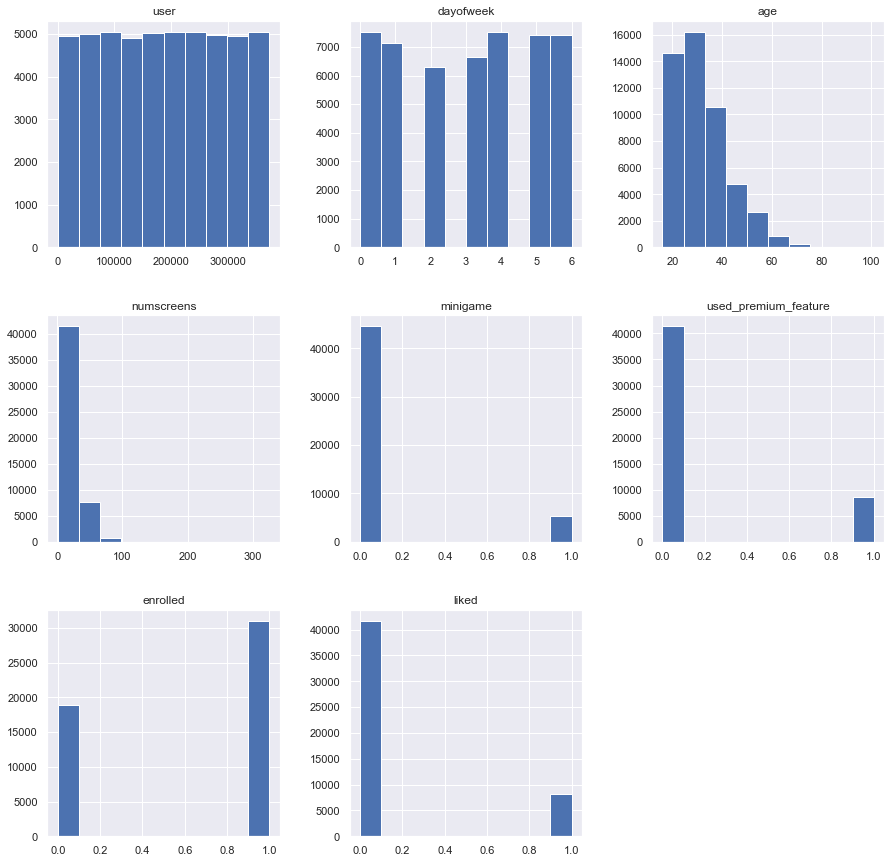

In [245]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df.hist(ax=ax)

## Converting data types

In [246]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [247]:
df.hour = pd.to_datetime(df.hour, format = ' %H:%M:%S').dt.hour

In [248]:
df['first_open'] = pd.to_datetime(df.first_open)
 
df['enrolled_date'] = pd.to_datetime(df.enrolled_date)
 
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [249]:
##creating new column for time taken in hours by customer to get enrolled after 1st login
df['time_to_enrolled'] = (df.enrolled_date-df.first_open).astype('timedelta64[h]')

In [250]:
(df[df.time_to_enrolled>10]['time_to_enrolled']).count()

8190

In [251]:
categorical_cols = ['minigame','used_premium_feature','enrolled']

# **Feature Engineering**

### Feature Selection

<AxesSubplot:>

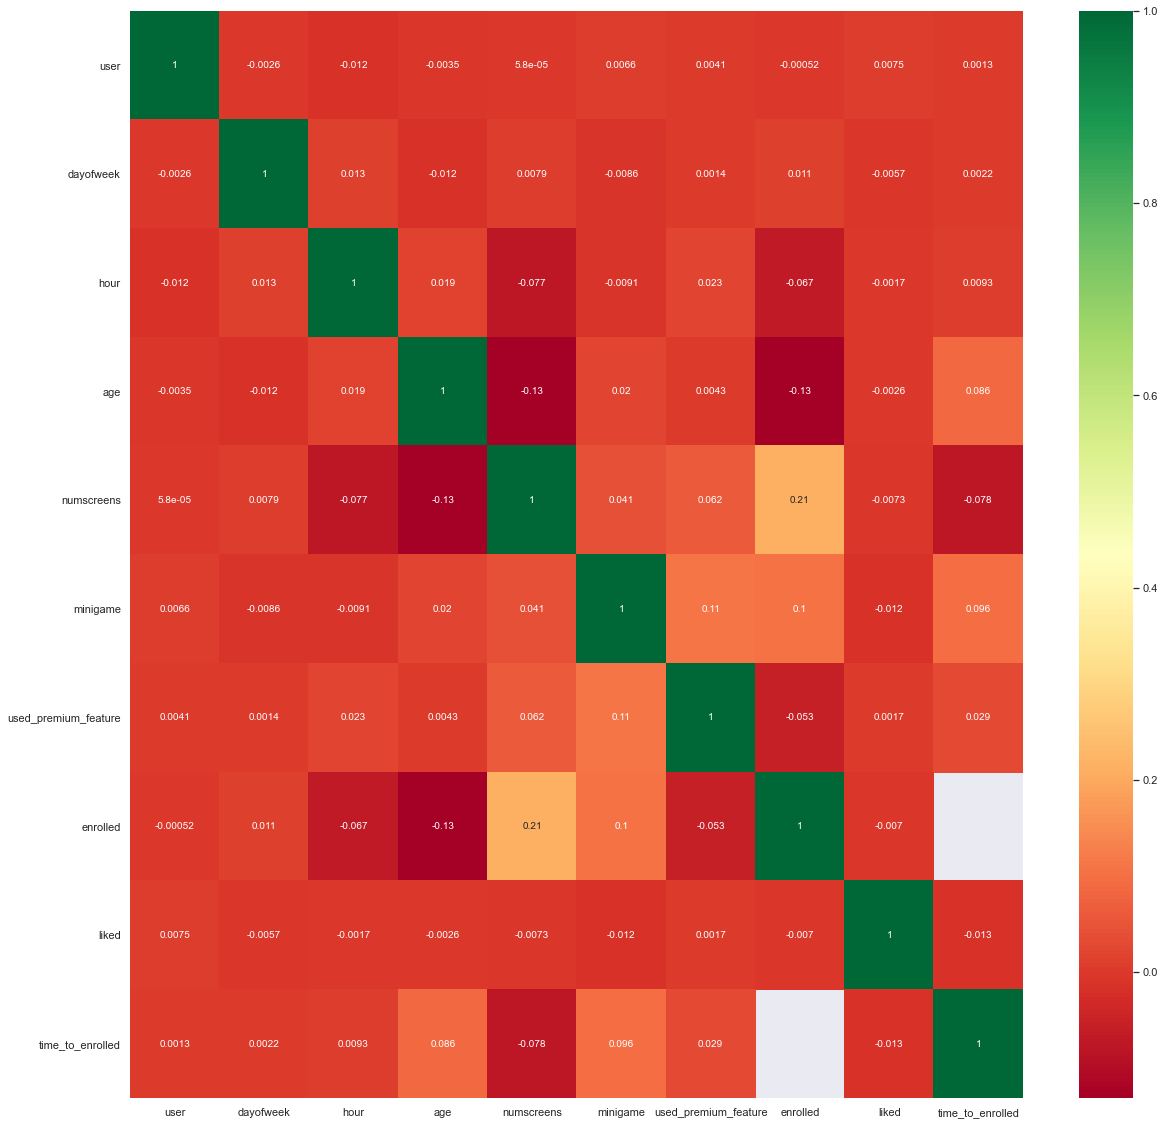

In [252]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [253]:
df.select_dtypes(include='number').drop(['enrolled'], axis = 1)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,time_to_enrolled
0,235136,3,2,23,15,0,0,0,NaN
1,333588,6,1,24,13,0,0,0,NaN
2,254414,1,19,23,3,0,1,1,NaN
3,234192,4,16,28,40,0,0,0,0.0
4,51549,1,18,31,32,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0.0
49996,169179,1,0,35,4,0,1,0,NaN
49997,302367,2,22,39,25,0,0,0,NaN
49998,324905,6,12,27,26,0,0,0,0.0


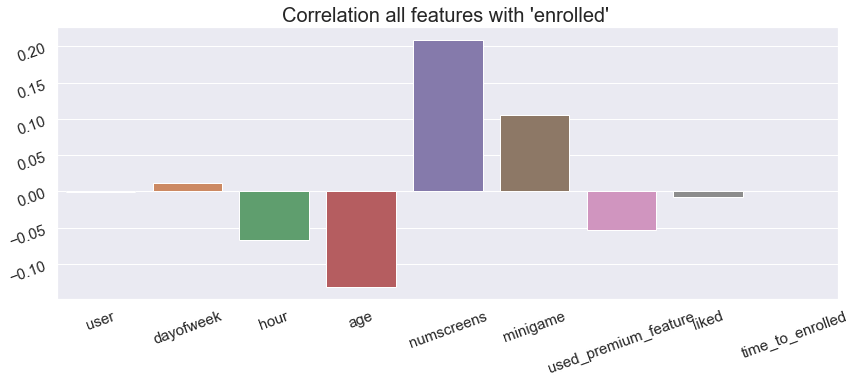

In [254]:
# show corelation barplot 
 
sns.set() # set background dark grid
plt.figure(figsize = (14,5))
plt.title("Correlation all features with 'enrolled' ", fontsize = 20)
df1 = df.select_dtypes(include='number').drop(['enrolled'], axis = 1) # drop 'enrolled' feature
ax =sns.barplot(df1.columns,df1.corrwith(df.enrolled)) # plot barplot 
ax.tick_params(labelsize=15, labelrotation = 20, color ="k") # decorate x &amp; y ticks font

In [255]:
##Drop some ‘time_to_enrolled’, ‘enrolled_date’, ‘first_open’ feature they are not strongly correlated to the result.
df_fs = df.drop(columns = ['user','time_to_enrolled', 'enrolled_date', 'first_open'])
df_fs.shape

(50000, 9)

## Treating screen_list column

In [256]:
sc_list = []
for i, value in enumerate(df.screen_list):
    x = value
    sc_list +=(x.split(','))

In [257]:
from collections import Counter

In [258]:
a = Counter(sc_list)

In [259]:
b = dict(a)

In [260]:
for w in sorted(b, key=b.get, reverse=True):
    print(w, b[w])

product_review 94218
Home 38098
ScanPreview 28351
VerifyPhone 26230
location 25888
Loan2 25319
VerifyDateOfBirth 23674
VerifySSN 21546
VerifyCountry 21158
VerifyToken 20332
product_review3 19613
SelectInstitution 19595
Cycle 17777
product_review2 17127
idscreen 17035
Credit3Container 16489
BankVerification 15901
Institutions 14648
joinscreen 13318
Splash 10038
Credit1 9741
Credit3Dashboard 9530
ReferralContainer 8448
ProfilePage 7902
Loan3 7160
Credit2 5402
Credit3 4889
Loan1 4603
CC1 4370
RewardsContainer 4200
CommunityAndInvites 4028
MLWebView 3828
Finances 3819
Settings 3491
Alerts 3457
Saving9 3005
CC1Category 2998
Saving8 2784
VerifyMobile 2693
Saving1 2627
Leaderboard 2576
Saving10 2456
EditProfile 2449
ProfileMaritalStatus 2378
ProfileChildren 2308
Saving4 2225
VerifyHousing 2149
ProfileEducation 2141
VerifyHousingAmount 2071
ProfileEducationMajor 2053
ProfileVerifySSN 2003
GroupedInstitutions 1814
History 1617
RewardDetail 1546
CC3 1475
Rewardjoinscreen 1404
Saving7 1360
Accoun

In [261]:
sc_name_sorted = sorted(b,key=b.get,reverse=True)#screen names in descending order

In [262]:
len(sc_name_sorted)

137

In [263]:
for screen_name in sc_name_sorted[0:50]:
    df_fs[screen_name] = df_fs.screen_list.str.contains(screen_name).astype(int)

In [264]:
df_fs.shape

(50000, 59)

In [265]:
df_fs.drop(columns = ['screen_list'], inplace=True)#dropping screen_list column

In [266]:
df_fs.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'product_review', 'Home',
       'ScanPreview', 'VerifyPhone', 'location', 'Loan2', 'VerifyDateOfBirth',
       'VerifySSN', 'VerifyCountry', 'VerifyToken', 'product_review3',
       'SelectInstitution', 'Cycle', 'product_review2', 'idscreen',
       'Credit3Container', 'BankVerification', 'Institutions', 'joinscreen',
       'Splash', 'Credit1', 'Credit3Dashboard', 'ReferralContainer',
       'ProfilePage', 'Loan3', 'Credit2', 'Credit3', 'Loan1', 'CC1',
       'RewardsContainer', 'CommunityAndInvites', 'MLWebView', 'Finances',
       'Settings', 'Alerts', 'Saving9', 'CC1Category', 'Saving8',
       'VerifyMobile', 'Saving1', 'Leaderboard', 'Saving10', 'EditProfile',
       'ProfileMaritalStatus', 'ProfileChildren', 'Saving4', 'VerifyHousing',
       'ProfileEducation', 'VerifyHousingAmount', 'ProfileEducationMajor'],
      dtype='object')

In [267]:
df_fs.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,product_review,Home,...,Leaderboard,Saving10,EditProfile,ProfileMaritalStatus,ProfileChildren,Saving4,VerifyHousing,ProfileEducation,VerifyHousingAmount,ProfileEducationMajor
0,3,2,23,15,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,24,13,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,19,23,3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,16,28,40,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
4,1,18,31,32,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [268]:
df_fs.dtypes

dayofweek                int64
hour                     int64
age                      int64
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
liked                    int64
product_review           int32
Home                     int32
ScanPreview              int32
VerifyPhone              int32
location                 int32
Loan2                    int32
VerifyDateOfBirth        int32
VerifySSN                int32
VerifyCountry            int32
VerifyToken              int32
product_review3          int32
SelectInstitution        int32
Cycle                    int32
product_review2          int32
idscreen                 int32
Credit3Container         int32
BankVerification         int32
Institutions             int32
joinscreen               int32
Splash                   int32
Credit1                  int32
Credit3Dashboard         int32
ReferralContainer        int32
ProfilePage              int32
Loan3   

## Class Imbalance

0    41750
1     8250
Name: liked, dtype: int64

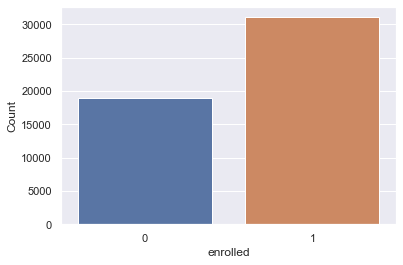

In [269]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='enrolled', data=df)
plt.xlabel('enrolled')
plt.ylabel('Count')
df.liked.value_counts()

In [270]:
df.enrolled.value_counts()[1]

31074

In [271]:
print('class 0 :{}%\nclass 1 :{}%'.format((df.enrolled.value_counts()[0])/50000*100,(df.enrolled.value_counts()[1])/50000*100))

class 0 :37.852000000000004%
class 1 :62.148%


## Oversampling

## Data Pre-processing

In [272]:
#hour and dayofweek are categorical in nature
dataset = pd.get_dummies(df_fs,columns=['dayofweek','hour'],drop_first=True)

In [273]:
dataset.shape

(50000, 85)

In [274]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'numscreens']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [355]:
X = dataset.drop(columns = 'enrolled')
Y = dataset['enrolled']

In [356]:
X['user'] = df.user

In [357]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [358]:
# take User ID in another variable 
train_userID = X_train['user']
X_train.drop(columns= 'user', inplace =True)
test_userID = X_test['user']
X_test.drop(columns= 'user', inplace =True)

In [352]:
X_train.columns

Index(['age', 'numscreens', 'minigame', 'used_premium_feature', 'liked',
       'product_review', 'Home', 'ScanPreview', 'VerifyPhone', 'location',
       'Loan2', 'VerifyDateOfBirth', 'VerifySSN', 'VerifyCountry',
       'VerifyToken', 'product_review3', 'SelectInstitution', 'Cycle',
       'product_review2', 'idscreen', 'Credit3Container', 'BankVerification',
       'Institutions', 'joinscreen', 'Splash', 'Credit1', 'Credit3Dashboard',
       'ReferralContainer', 'ProfilePage', 'Loan3', 'Credit2', 'Credit3',
       'Loan1', 'CC1', 'RewardsContainer', 'CommunityAndInvites', 'MLWebView',
       'Finances', 'Settings', 'Alerts', 'Saving9', 'CC1Category', 'Saving8',
       'VerifyMobile', 'Saving1', 'Leaderboard', 'Saving10', 'EditProfile',
       'ProfileMaritalStatus', 'ProfileChildren', 'Saving4', 'VerifyHousing',
       'ProfileEducation', 'VerifyHousingAmount', 'ProfileEducationMajor',
       'dayofweek_1', 'dayofweek_2', 'dayofweek_3', 'dayofweek_4',
       'dayofweek_5', 'dayofwee

In [278]:
print('Shape of X_train = ', X_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (40000, 84)
Shape of X_test =  (10000, 84)
Shape of y_train =  (40000,)
Shape of y_test =  (10000,)


## Model Building

In [279]:
# import required packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, auc

### Decision Tree

In [280]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7858

In [281]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(false_positive_rate, true_positive_rate)
roc_auc_dt

0.7726319346430045

### KNeighbors Classifier Model

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### Note: Following knn code takes a lot of time to execute

In [149]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
for i in range(1, 21):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

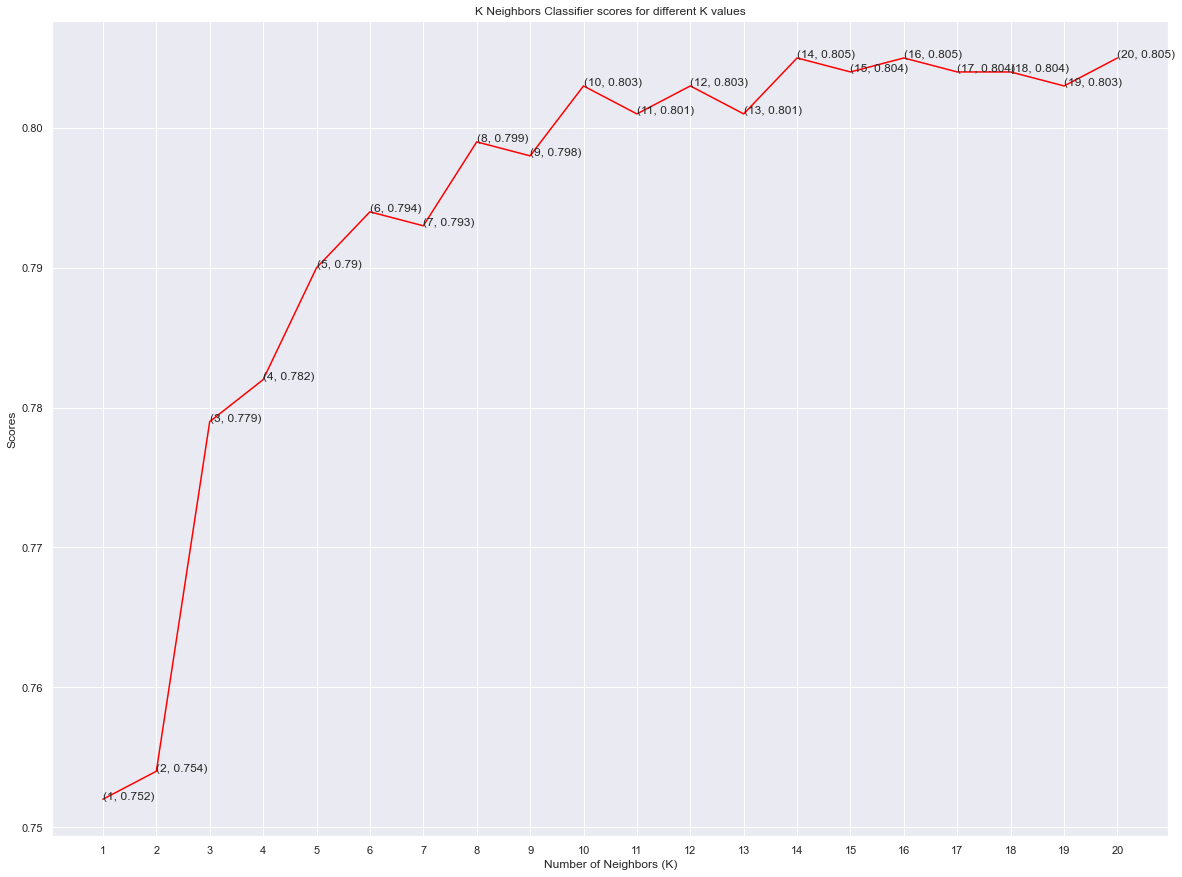

In [150]:
#Elbow method
# Plotting the results of knn_scores
plt.figure(figsize=(15,6))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [151]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_scores = []
for i in range(20, 40, 2):
  knn_classifier = KNeighborsClassifier(n_neighbors=i)
  cvs_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
  knn_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

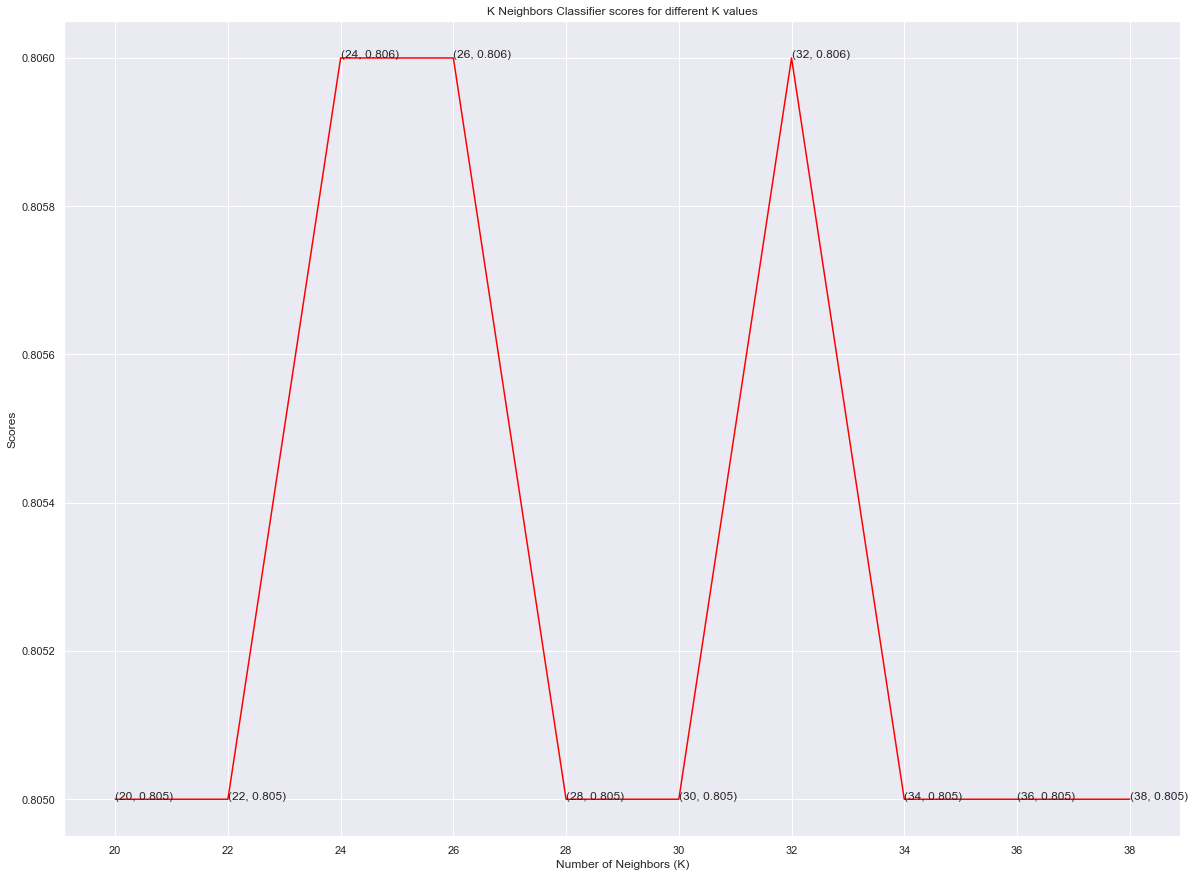

In [155]:
#Elbow method
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(20, 40, 2)], knn_scores, color = 'red')
for i in range(1,11):
    plt.text((i+9)*2, knn_scores[i-1], ((i+9)*2, knn_scores[i-1]))
plt.xticks([i for i in range(20, 40,2)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [157]:
# Training the knn classifier model with k value as 20
knn_classifier = KNeighborsClassifier(n_neighbors=20)
cvs_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print("KNeighbours Classifier Accuracy with K=20 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=12 is: 80.49%


In [283]:
knn_classifier.fit(X_train,y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.7998

In [166]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      3779
           1       0.85      0.83      0.84      6221

    accuracy                           0.80     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.80      0.80      0.80     10000



In [163]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc_dt = auc(false_positive_rate, true_positive_rate)
roc_auc_dt

0.7915708511733661

### Logistic Regression

In [204]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 0, penalty = 'l2')
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
 
accuracy_score(y_test, y_pred_lr)

0.8211

In [205]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78      3779
           1       0.89      0.82      0.85      6221

    accuracy                           0.82     10000
   macro avg       0.81      0.82      0.81     10000
weighted avg       0.83      0.82      0.82     10000



### Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

In [284]:
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [173]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [178]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=3, 
                               random_state=42, n_jobs = -1,scoring='roc_auc')

In [180]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [184]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [182]:
rf_random.best_score_

0.9188542094852536

In [185]:
rf_tuned = RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [186]:
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42)

In [189]:
def score(model):
    cvs_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("{} Accuracy with n_estimators=300 is: {}%".format(model,round(cvs_scores.mean(), 4)*100))

In [190]:
score(rf_tuned)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42) Accuracy with n_estimators=90 is: 84.45%


In [192]:
y_pred_rf = rf_tuned.predict(X_test)

In [193]:
accuracy_score(y_test,y_pred_rf)#accuracy for test data

0.8433

In [199]:
print('\t\tclassification report for test data\n')
print(classification_report(y_test,y_pred_rf))#for test data

		classification report for test data

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      3779
           1       0.89      0.85      0.87      6221

    accuracy                           0.84     10000
   macro avg       0.83      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



### XG Boost Classifier

In [206]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

0.8389

In [208]:
classifier = XGBClassifier()

In [211]:
params = {
    'n_estimators'     : [100,200,300,400,500],
    'learning_rate'    : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth'        : [1,2,3,4,5,6,8,10],
    'min_child_weight' : [1,3,5,7,10],
    'colsample_bytree' : [0.3,0.4,0.6,0.8],
    'gamma'            : [0,0.1,0.2,0.3,0.4]
}

In [226]:
random_search_xg = RandomizedSearchCV(classifier,param_distributions=params,n_iter=40,n_jobs=-1,cv=3,verbose=3,scoring='roc_auc')

In [ ]:
random_search_xg.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 19.8min


In [222]:
random_search_xg.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [220]:
y_pred_xg = random_search_xg.predict(X_test)

In [307]:
accuracy_score(y_test,y_pred_xg)

83.88

In [223]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3779
           1       0.89      0.85      0.87      6221

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



In [224]:
confusion_matrix(y_test,y_pred_xg)

array([[3091,  688],
       [ 924, 5297]], dtype=int64)

### Best Model

In [310]:
'''model_name = [dtmodel, knn_classifier, rf_tuned, lr_model,]
train_score = []
test_score = []'''

def score(model):
    train_score = []
    test_score = []
    cvs_scores = cross_val_score(model, X_train, y_train, cv=5)
    train_score.append(cvs_scores.mean())
    y_pred_model = model.predict(X_test)
    accuracy_score(y_test,y_pred_model)
    test_score.append(accuracy_score)
    print("{} \nTrain score: {}%".format(str(model),round(cvs_scores.mean(), 2)*100))

    print('test score:{}%'.format(round(accuracy_score(y_test,y_pred_model),2)*100))
    
    print('__________________________')
    
    return train_score, test_score

In [311]:
model_name = [dt_model, rf_tuned, lr_model,]

In [312]:
for i in model_name:
    score(i)

DecisionTreeClassifier(criterion='entropy', random_state=0) 
Train score: 78.47%
test score:79.0%
__________________________
RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=42) 
Train score: 84.45%
test score:84.0%
__________________________


C:\Users\emoin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0) 
Train score: 82.50999999999999%
test score:82.0%
__________________________


In [328]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.RED+color.BOLD + 'Hello World !')

Hello World !


### Best Models are Random Forest and XG Boost with 85% accuracy

In [347]:
print(color.BOLD+color.BLUE+'\t\t\tRandom Forest\n'+color.END)
print(color.BOLD+color.PURPLE+'Accuracy is {}%'.format(accuracy_score(y_test,y_pred_rf)*100),color.END,'\n')
print('\t\tclassification report for test data\n')
print(classification_report(y_test,y_pred_xg))#for test data

			Random Forest

Accuracy is 84.33%  

		classification report for test data

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3779
           1       0.89      0.85      0.87      6221

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



In [346]:
print(color.BOLD+color.BLUE+'\t\t\tXG Boost\n'+color.END)
print(color.BOLD+color.PURPLE+'Accuracy is {}%'.format(accuracy_score(y_test,y_pred_xg)*100),color.END,'\n')
print('\t\tclassification report for test data\n')
print(classification_report(y_test,y_pred_xg))#for test data

			XG Boost

Accuracy is 83.88%  

		classification report for test data

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      3779
           1       0.89      0.85      0.87      6221

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



### Mapping predicted output to the target

In [369]:
final_result = pd.concat([test_userID, y_test], axis = 1)
final_result['predicted result'] = y_pred_rf
final_result.reset_index(inplace=True,drop=True) 
print(final_result)

        user  enrolled  predicted result
0     239786         1                 1
1     279644         1                 1
2      98290         0                 0
3     170150         1                 1
4     237568         1                 0
...      ...       ...               ...
9995  143036         1                 1
9996   91158         1                 1
9997  248318         0                 0
9998  142418         1                 1
9999  279355         1                 1

[10000 rows x 3 columns]


## Saving Machine Learning model

In [376]:
#from sklearn.externals import joblib 
import joblib
# Save the model as a pickle in a file 
joblib.dump(rf_tuned, 'rf_model.pkl') 

# Load the model from the file 
rf_from_joblib = joblib.load('rf_model.pkl') 

# Use the loaded model to make predictions 
print('Accuracy for train data',rf_from_joblib.score(X_train,y_train))#train data
print('Accuracy for test data',rf_from_joblib.score(X_test,y_test))#test data



Accuracy for train data 0.909925
Accuracy for test data 0.8433
